In [62]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import random
from sklearn.model_selection import train_test_split
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [63]:
## dataset downloaded from https://www.kaggle.com/code/swannnn/wine-classification-logistic-regression/input
## This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details
df=pd.read_csv('winequality-red.csv')
# add index
df['SN'] = np.arange(len(df)) 

# ## rename column names
# df = df.rename(columns={'MALE': 'GENDER'})

## replace spaces ' ' for xolumn names and add '_'
df.columns = df.columns.str.replace(' ', '_')
display(df)

# Applying the condition to convert 6 qualities of wines in to 3 categories
df.loc[df["quality"] == 3, "quality"] = 0
df.loc[df["quality"] == 4, "quality"] = 0
df.loc[df["quality"] == 5, "quality"] = 1
df.loc[df["quality"] == 6, "quality"] = 1
df.loc[df["quality"] == 7, "quality"] = 2
df.loc[df["quality"] == 8, "quality"] = 2
display(df)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,SN
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1596
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,SN
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,1594
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,1595
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,1596
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,1597


In [64]:
df1=df.copy()
print(df['quality'].unique())

[1 2 0]


In [65]:
# create dummy variables for wine quality using get_dummies, then exclude the first dummy column
df = pd.get_dummies(df, columns = ['quality'], drop_first=True)
df


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,SN,quality_1,quality_2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2,1,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3,1,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594,1,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595,1,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1596,1,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1597,1,0


#### explore the nature of relationship between dataset attributes

<AxesSubplot:>

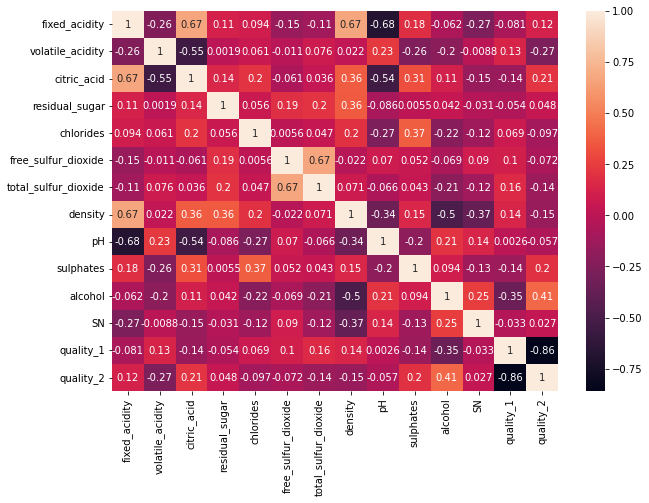

In [106]:
# Creating a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
## we can take the highly Correlated Values with Hot encoded Class Values

C:\Users\graduate\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\graduate\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\graduate\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

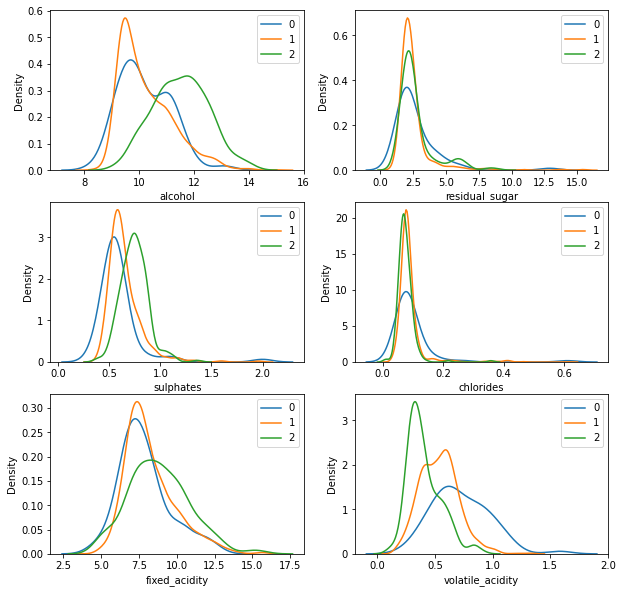

In [67]:
fig, ax = plt.subplots(2, 3, figsize=(10,10))

ax = plt.subplot(3,2,1)
sns.distplot(df1[df1.quality == 0].alcohol, hist=False, label='0')
sns.distplot(df1[df1.quality == 1].alcohol, hist=False, label='1')
sns.distplot(df1[df1.quality == 2].alcohol, hist=False, label='2')
plt.legend()

ax = plt.subplot(3,2,2)
sns.distplot(df1[df1.quality == 0].residual_sugar, hist=False, label='0')
sns.distplot(df1[df1.quality == 1].residual_sugar, hist=False, label='1')
sns.distplot(df1[df1.quality == 2].residual_sugar, hist=False, label='2')
plt.legend()

ax = plt.subplot(3,2,3)
sns.distplot(df1[df1.quality == 0].sulphates, hist=False, label='0')
sns.distplot(df1[df1.quality == 1].sulphates, hist=False, label='1')
sns.distplot(df1[df1.quality == 2].sulphates, hist=False, label='2')
plt.legend()

ax = plt.subplot(3,2,4)
sns.distplot(df1[df1.quality == 0].chlorides, hist=False, label='0')
sns.distplot(df1[df1.quality == 1].chlorides, hist=False, label='1')
sns.distplot(df1[df1.quality == 2].chlorides, hist=False, label='2')
plt.legend()

ax = plt.subplot(3,2,5)
sns.distplot(df1[df1.quality == 0].fixed_acidity, hist=False, label='0')
sns.distplot(df1[df1.quality == 1].fixed_acidity, hist=False, label='1')
sns.distplot(df1[df1.quality == 2].fixed_acidity, hist=False, label='2')
plt.legend()

ax = plt.subplot(3,2,6)
sns.distplot(df1[df1.quality == 0].volatile_acidity, hist=False, label='0')
sns.distplot(df1[df1.quality == 1].volatile_acidity, hist=False, label='1')
sns.distplot(df1[df1.quality == 2].volatile_acidity, hist=False, label='2')
plt.legend()

##### To Check whether the two variables selected are predictive when considered together, let's create a correlation plot

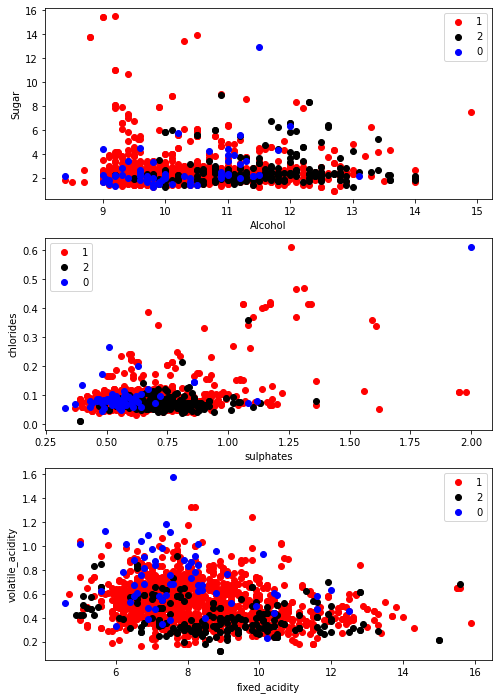

In [68]:
colors = {0:'blue',1:'red',2:'black'}
fig, ax = plt.subplots(3, 1, figsize=(8,12))

ax = plt.subplot(3,1,1)
for Class in df1.quality.unique():
  data = df1[df1.quality == Class]
  ax.scatter(x=data.alcohol, y=data.residual_sugar, c=colors[Class], label=Class)
ax.set_xlabel('Alcohol')
ax.set_ylabel('Sugar')
ax.legend()

ax = plt.subplot(3,1,2)
for Class in df1.quality.unique():
  data = df1[df1.quality == Class]
  ax.scatter(x=data.sulphates, y=data.chlorides, c=colors[Class], label=Class)
ax.set_xlabel('sulphates')
ax.set_ylabel('chlorides')
ax.legend()

ax = plt.subplot(3,1,3)
for Class in df1.quality.unique():
  data = df1[df1.quality == Class]
  ax.scatter(x=data.fixed_acidity, y=data.volatile_acidity, c=colors[Class], label=Class)
ax.set_xlabel('fixed_acidity')
ax.set_ylabel('volatile_acidity')
ax.legend()

##### Let's try Logistic Regression for alcohol and sugar as a nice distinction can be seen in the correlation plot

In [69]:
# Split the data for testing\ Logistic regression with splits for predicting quality1 wine
X1 = df[['alcohol','residual_sugar']]
Y1 = df.quality_1

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1, test_size = 0.2)
t = 0.35
lm = LogisticRegression(class_weight={0:t, 1:1-t})
lm.fit(X_train1, Y_train1)
print(lm.intercept_)
print(lm.coef_)

Y_pred1 = lm.predict(X_test1)
Y_pred1

# display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))
p1,r1,f1,s1 = precision_recall_fscore_support(Y_test1, Y_pred1, labels=[0,1])
display('precision = {}'.format(p1))
display('recall = {}'.format(r1))
display('f-score = {}'.format(f1))

[9.7583409]
[[-0.69777956 -0.04984965]]


'precision = [1.         0.82758621]'

'recall = [0.01785714 1.        ]'

'f-score = [0.03508772 0.90566038]'

Let's try Logistic Regression for chlorides and sulphates to disntinguish if a wine is **quality class 2** or not

In [70]:
# Split the data for testing\ Logistic regression with splits for predicting quality Class2
# Running model on total chlorides and sulphates
X2 = df[['fixed_acidity','volatile_acidity']]
Y2 = df.quality_2

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,Y2, test_size = 0.2)
t=0.15
lm2 = LogisticRegression(class_weight={0:t, 1:1-t})
lm2.fit(X_train2, Y_train2)
print(lm2.intercept_)
print(lm2.coef_)

Y_pred2 = lm2.predict(X_test2)
Y_pred2

# display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))
p2,r2,f2,s2 = precision_recall_fscore_support(Y_test2, Y_pred2, labels=[0,1])
display('precision = {}'.format(p2))
display('recall = {}'.format(r2))
display('f-score = {}'.format(f2))

[0.58207618]
[[ 0.09043293 -3.07896203]]


'precision = [0.9342723  0.27102804]'

'recall = [0.71841155 0.6744186 ]'

'f-score = [0.8122449  0.38666667]'

Text(0, 0.5, 'sugar')

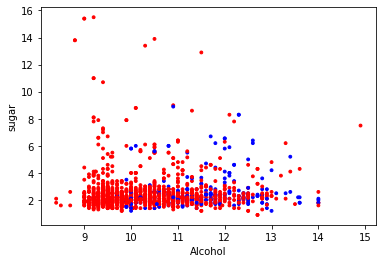

In [71]:
# Plot the dataset colored by actual value
color = ['r' if y_ == 0 else 'b' for y_ in Y2]
plt.scatter(df.alcohol, df.residual_sugar, c=color, s=8)
plt.xlabel('Alcohol')
plt.ylabel('sugar')

Text(0, 0.5, 'sulphates')

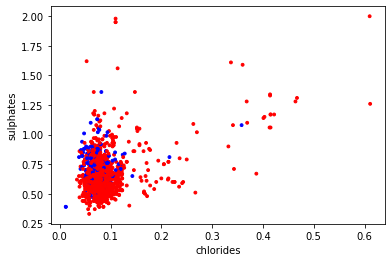

In [72]:
# Plot the dataset colored by actual value
color = ['r' if y_ == 0 else 'b' for y_ in Y2]
plt.scatter(df.chlorides, df.sulphates, c=color, s=8)
plt.xlabel('chlorides')
plt.ylabel('sulphates')

Text(0, 0.5, 'volatile acidity')

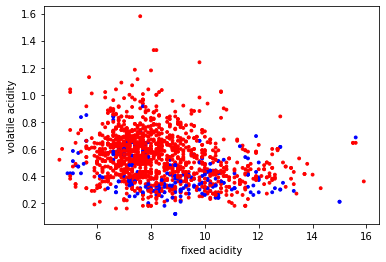

In [73]:
color = ['r' if y_ == 0 else 'b' for y_ in Y2]
plt.scatter(df.fixed_acidity, df.volatile_acidity, c=color, s=8)
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')

##### decision Boubdary

Text(0, 0.5, 'volatile_acidity')

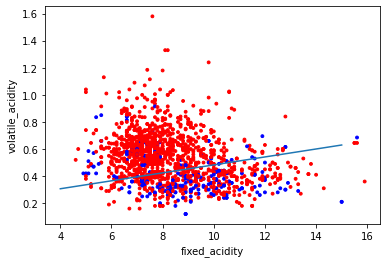

In [81]:
# fOR fixed and volatile acidity
color = ['r' if y_ == 0 else 'b' for y_ in Y2]
plt.scatter(df.fixed_acidity, df.volatile_acidity, c=color, s=8)

b0 = lm2.intercept_[0]
b = lm2.coef_[0]

Xdb = [4,15]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('fixed_acidity')
plt.ylabel('volatile_acidity')

##### Let's try Using Support Vector Machines to See the Difference

'precision = [0.95132743 0.35106383]'

'recall = [0.77898551 0.75      ]'

'f-score = [0.85657371 0.47826087]'

Text(0, 0.5, 'volatile_acidity')

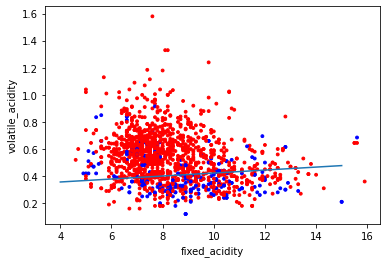

In [91]:
from sklearn import svm
X = df[['fixed_acidity','volatile_acidity']]
Y = df.quality_2
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

clf = svm.SVC(kernel='linear', class_weight={0:1, 1:4})
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(Y_test, Y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

# fOR fixed and vlatile acidity using SVM
color = ['r' if y_ == 0 else 'b' for y_ in Y]
plt.scatter(df.fixed_acidity, df.volatile_acidity, c=color, s=8)

b0 = clf.intercept_[0]
b = clf.coef_[0]

Xdb = [4,15]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('fixed_acidity')
plt.ylabel('volatile_acidity')

#### Classification using a polynomial kernel

In [102]:
# Try changing the degree
clf = svm.SVC(kernel='poly', degree=5,class_weight={0:1, 1:4})
clf.fit(X, Y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(Y, y_pred)
display('f-score = {}'.format(f))

'f-score = [0.90178259 0.16617211]'

#### Classification using a radial basis function (RBF)
RBFs can handle very complex decision boundaries but require more data to learn.

In [104]:
# Try changing the degree
clf = svm.SVC(kernel='rbf',class_weight={0:1, 1:4})
clf.fit(X, Y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(Y, y_pred)
display('f-score = {}'.format(f))

'f-score = [0.86995516 0.33333333]'